In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_csv_path = "https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/train.csv"
test_csv_path = "https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/test.csv"
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
print(f"Test set:\n{'-' * 100}\nFirst five columns -> {list(test_df.columns[:5])}\nLast five columns -> {list(test_df.columns[-5:])}\n")
print(f"Train set:\n{'-' * 100}\nFive five columns -> {list(train_df.columns[:5])}\nLast five columns -> {list(train_df.columns[-5:])}")

Test set:
----------------------------------------------------------------------------------------------------
First five columns -> ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4']
Last five columns -> ['pixel779', 'pixel780', 'pixel781', 'pixel782', 'pixel783']

Train set:
----------------------------------------------------------------------------------------------------
Five five columns -> ['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3']
Last five columns -> ['pixel779', 'pixel780', 'pixel781', 'pixel782', 'pixel783']


In [ ]:
ftrain = train_df.iloc[:,1:]/255.0
t_train = train_df['label']
ftrain.set_index(keys = t_train,inplace= False).T.describe()

label,1,0,1,4,0,0,7,3,5,3,...,3,1,9,6,4,0,1,7,6,9
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,...,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.083278,0.223134,0.067152,0.075155,0.255567,0.115351,0.085794,0.121489,0.139656,0.157913,...,0.107198,0.108373,0.143467,0.172814,0.160399,0.146609,0.067102,0.157583,0.131958,0.090926
std,0.253570,0.389066,0.233957,0.226616,0.411225,0.286204,0.247198,0.277065,0.315929,0.333052,...,0.277096,0.296034,0.320572,0.351216,0.336728,0.316209,0.236696,0.342426,0.309785,0.249467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.259804,0.000000,0.000000,0.515686,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(ftrain,t_train)


SVC(kernel='linear')

In [ ]:
train_pred = model.predict(ftrain)
train_pred

array([1, 0, 1, ..., 7, 6, 9])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(t_train,train_pred))
print(classification_report(t_train,train_pred))

[[4130    0    0    0    0    1    1    0    0    0]
 [   0 4674    2    1    0    0    0    0    6    1]
 [   2    7 4092   16   13    3    6    9   27    2]
 [   6    3   48 4188    1   49    0    5   38   13]
 [   2    6    3    1 3999    0    1    3    0   57]
 [   4    8   12   67    4 3649   19    0   29    3]
 [   1    0    2    1    4   11 4116    0    2    0]
 [   2    3   22    4   10    1    0 4308    2   49]
 [  11   30   19   60    2   49    3    2 3880    7]
 [   4    8    2   12   61    6    0   76   11 4008]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4132
           1       0.99      1.00      0.99      4684
           2       0.97      0.98      0.98      4177
           3       0.96      0.96      0.96      4351
           4       0.98      0.98      0.98      4072
           5       0.97      0.96      0.96      3795
           6       0.99      0.99      0.99      4137
           7       0.98      0.98   

In [ ]:
ftest = test_df/255
ftest.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,27990,27991,27992,27993,27994,27995,27996,27997,27998,27999
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,...,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.197099,0.199745,0.074380,0.081072,0.121519,0.113771,0.214236,0.158303,0.183628,0.118707,...,0.119898,0.191472,0.028111,0.133598,0.105197,0.131052,0.076266,0.124820,0.134029,0.179547
std,0.369479,0.365597,0.220351,0.241531,0.296426,0.279479,0.379541,0.337842,0.349905,0.285258,...,0.297305,0.367039,0.128333,0.312211,0.274100,0.310206,0.234404,0.300001,0.315047,0.352139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.066667,0.168627,0.000000,0.000000,0.000000,0.000000,0.231373,0.000000,0.091176,0.000000,...,0.000000,0.044118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000


In [ ]:
test_pred = pd.Series(model.predict(ftest))
test_pred

0        2
1        0
2        5
3        4
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Length: 28000, dtype: int64

Now let's get the count of the predicted labels (or handwritten digits) to see their distribution.

In [ ]:
test_pred.value_counts()

1    3288
2    2882
7    2868
3    2818
0    2810
4    2808
6    2729
9    2677
8    2609
5    2511
dtype: int64

In [ ]:
test_df.insert(loc=0,column='label',value =test_pred)
test_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
gtest = test_df.groupby(by='label')
zerodf = gtest.get_group(0)
zerodf

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


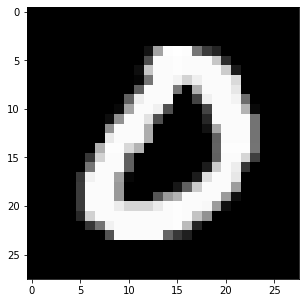

In [ ]:
pzero = zerodf.iloc[1,1:].values.reshape(28,28)
plt.figure(figsize=(5,5))
plt.imshow(pzero,cmap='gray',vmin=0,vmax =255)
plt.show()

In [ ]:
threedf = gtest.get_group(3)
threedf

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27975,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27980,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27985,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27992,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


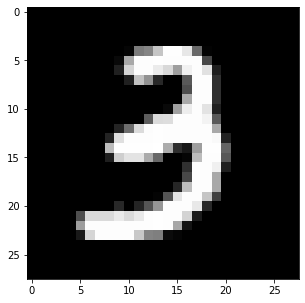

In [ ]:
pthree = threedf.iloc[1,1:].values.reshape(28,28)
plt.figure(figsize=(5,5))
plt.imshow(pthree,cmap='gray',vmin=0,vmax =255)
plt.show()

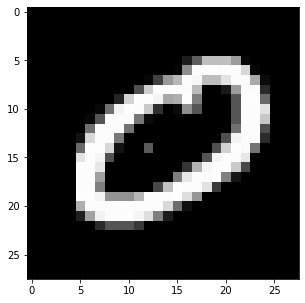

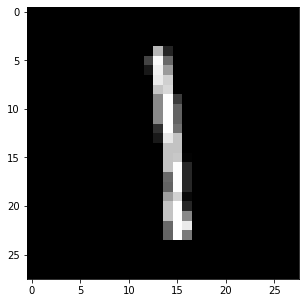

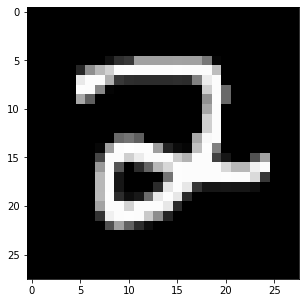

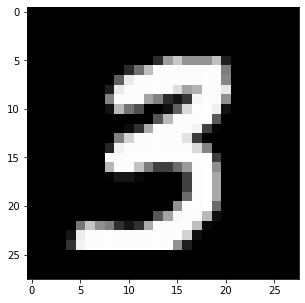

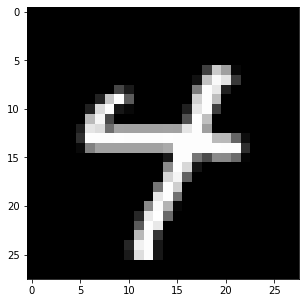

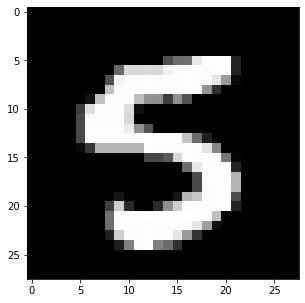

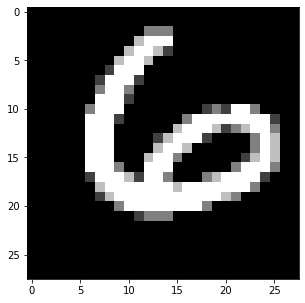

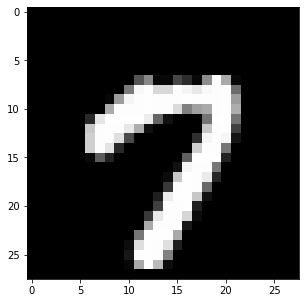

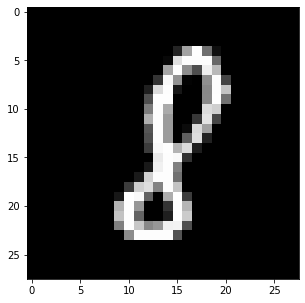

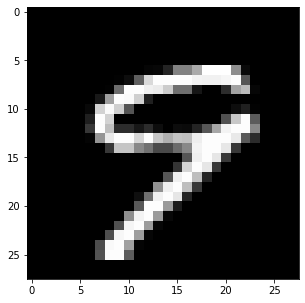

In [ ]:
def vis(digit):
  df1 = gtest.get_group(digit)
  row = df1.index.values[1]
  arr = df1.iloc[row,1:].values.reshape(28,28)
  plt.figure(figsize=(5,5))
  plt.imshow(arr,cmap='gray',vmin=0,vmax =255)
  plt.show()
for i in range(0,10):
  vis(i)
